<a href="https://www.kaggle.com/code/luisatutau/global-music-streaming-trends?scriptVersionId=246197770" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-music-streaming-trends-and-listener-insights/Global_Music_Streaming_Listener_Preferences.csv


In [2]:
# 📊 Global Music Streaming Trends: Listener Insights & Analysis
# Exploring Music Preferences Across Platforms & Countries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/kaggle/input/global-music-streaming-trends-and-listener-insights/Global_Music_Streaming_Listener_Preferences.csv"
df = pd.read_csv(file_path)

# Display basic info
df.head()

,User_ID,Age,Country,Streaming Platform,Top Genre,Minutes Streamed Per Day,Number of Songs Liked,Most Played Artist,Subscription Type,Listening Time (Morning/Afternoon/Night),Discover Weekly Engagement (%),Repeat Song Rate (%)
0,U1000,34,Japan,Tidal,Reggae,295,138,Adele,Free,Afternoon,47.42,16.74
1,U1001,24,Germany,Deezer,Country,86,388,Ed Sheeran,Premium,Night,12.06,69.25
2,U1002,49,Germany,Deezer,Pop,363,368,Post Malone,Premium,Afternoon,47.19,67.38
3,U1003,55,Australia,YouTube,Reggae,348,349,Dua Lipa,Premium,Morning,31.27,76.51
4,U1004,13,Germany,Amazon Music,Reggae,30,328,Adele,Free,Night,30.68,43.41


In [3]:
# ## 📂 Data Loading & Exploration
# 🔍 Let's start by inspecting the dataset structure.

# Check for missing values and data types
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

User_ID                                     0
Age                                         0
Country                                     0
Streaming Platform                          0
Top Genre                                   0
Minutes Streamed Per Day                    0
Number of Songs Liked                       0
Most Played Artist                          0
Subscription Type                           0
Listening Time (Morning/Afternoon/Night)    0
Discover Weekly Engagement (%)              0
Repeat Song Rate (%)                        0
dtype: int64

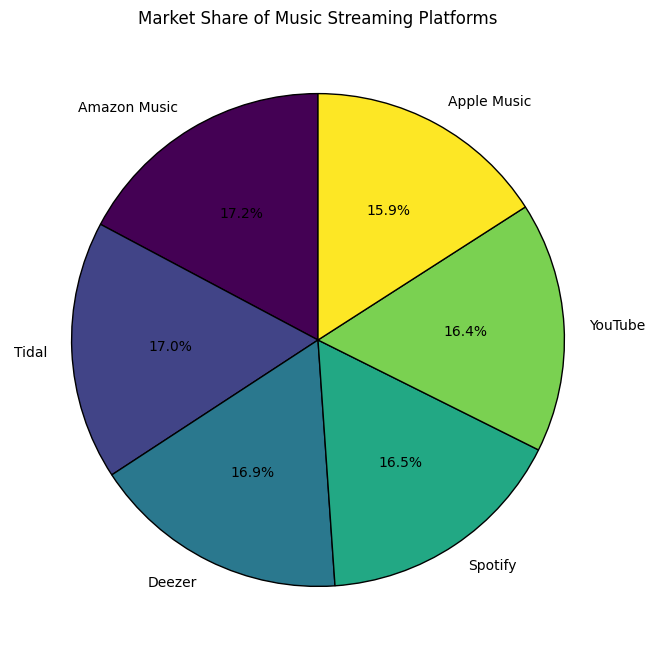

In [4]:
# ## 🎂 Music Streaming Platforms: Market Share
# 🔍 What percentage of users are on each platform?

plt.figure(figsize=(8,8))
df["Streaming Platform"].value_counts().plot.pie(autopct='%1.1f%%', cmap="viridis", startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Market Share of Music Streaming Platforms")
plt.ylabel('')  # Remove the default ylabel
plt.show()

In [5]:
df["Streaming Platform"].value_counts(normalize=True) * 100

Streaming Platform
Amazon Music    17.22
Tidal           17.00
Deezer          16.88
Spotify         16.54
YouTube         16.44
Apple Music     15.92
Name: proportion, dtype: float64

In [6]:
df.groupby("Country")["Streaming Platform"].value_counts(normalize=True).unstack() * 100

Streaming Platform,Amazon Music,Apple Music,Deezer,Spotify,Tidal,YouTube
Country,,,,,,
Australia,15.969582,17.490494,15.019011,15.779468,21.482890,14.258555
Brazil,17.913386,14.763780,16.929134,15.354331,17.125984,17.913386
Canada,16.173570,15.581854,16.370809,16.173570,16.568047,19.132150
France,14.807302,15.415822,18.052738,16.024341,19.066937,16.632860
Germany,17.197452,15.711253,17.409766,15.498938,17.409766,16.772824
India,15.918367,13.877551,22.448980,17.142857,15.102041,15.510204
Japan,17.311609,19.348269,15.071283,16.904277,13.849287,17.515275
South Korea,17.054264,12.403101,15.697674,20.155039,18.217054,16.472868
UK,20.542636,16.666667,15.310078,15.116279,16.085271,16.279070


<Figure size 1200x600 with 0 Axes>

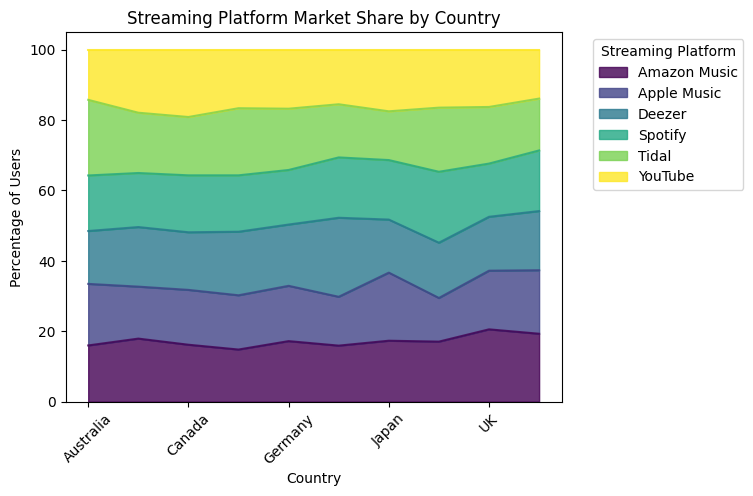

In [7]:
# ## 🌍 Streaming Platform Market Share by Country
# 📌 How does platform preference vary across different countries?

import matplotlib.pyplot as plt

# Pivot the data to get the percentage distribution of platforms per country
df_pivot = df.pivot_table(index="Country", columns="Streaming Platform", aggfunc="size", fill_value=0)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100  # Convert to percentages

# Create a stacked area chart
plt.figure(figsize=(12,6))
df_pivot.plot(kind="area", stacked=True, colormap="viridis", alpha=0.8)
plt.title("Streaming Platform Market Share by Country")
plt.ylabel("Percentage of Users")
plt.xlabel("Country")
plt.legend(title="Streaming Platform", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

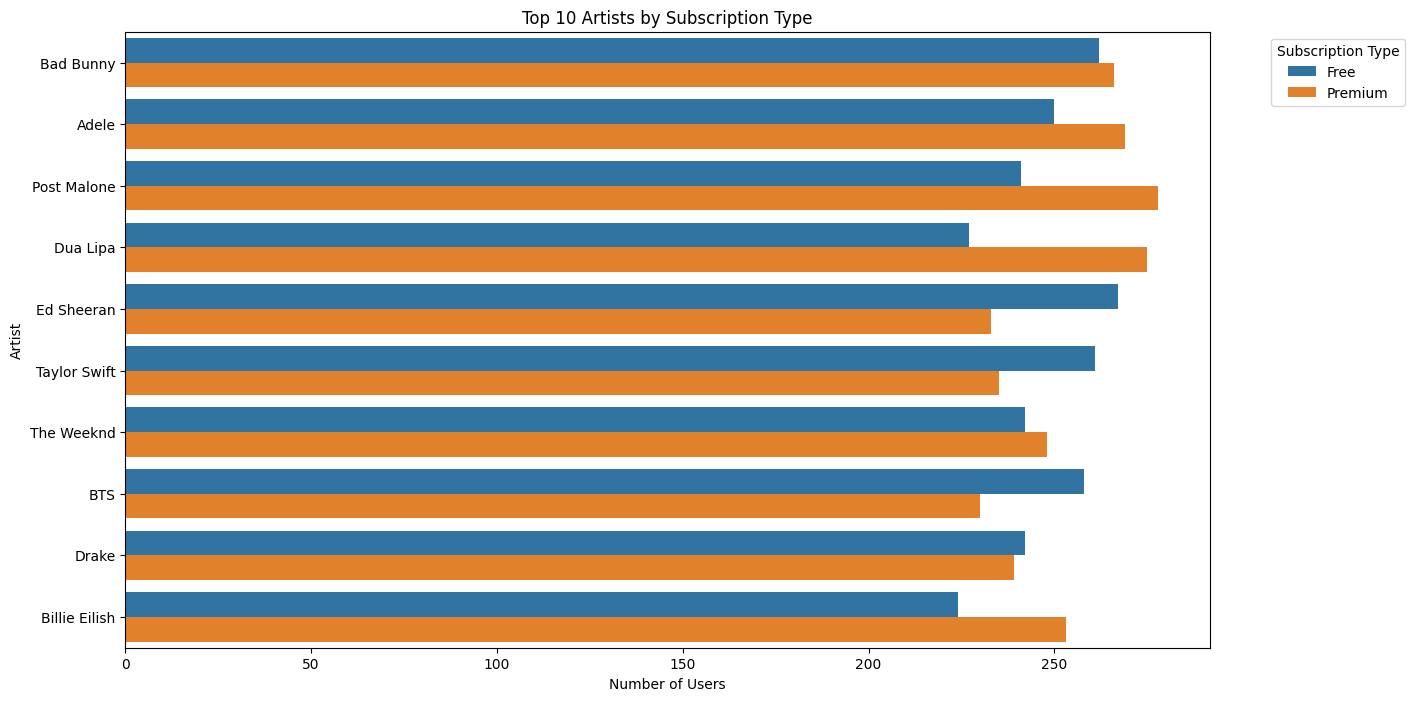

In [8]:
# ## 💎 Free vs. Premium: Top Artists
# 📌 Do free and premium users prefer different artists?

plt.figure(figsize=(14,8))
sns.countplot(data=df, y="Most Played Artist", hue="Subscription Type", order=df["Most Played Artist"].value_counts().index[:10])
plt.title("Top 10 Artists by Subscription Type")
plt.xlabel("Number of Users")
plt.ylabel("Artist")
plt.legend(title="Subscription Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

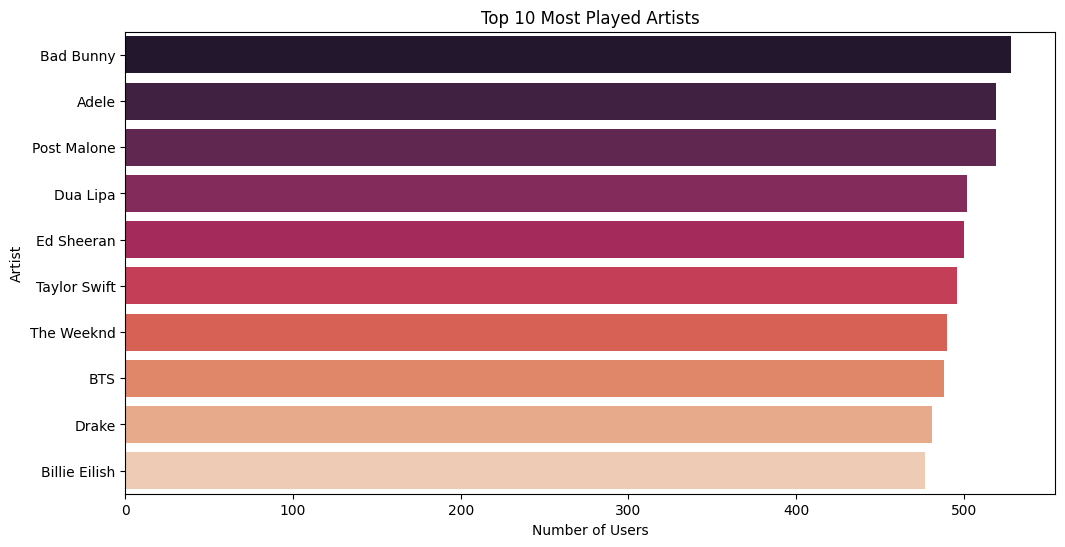

In [9]:
# ## 🎤 Most Played Artists: Global Ranking
# 📌 Which artists are the most streamed worldwide?

plt.figure(figsize=(12,6))
sns.countplot(data=df, y="Most Played Artist", order=df["Most Played Artist"].value_counts().index[:10], palette="rocket")
plt.title("Top 10 Most Played Artists")
plt.xlabel("Number of Users")
plt.ylabel("Artist")
plt.show()


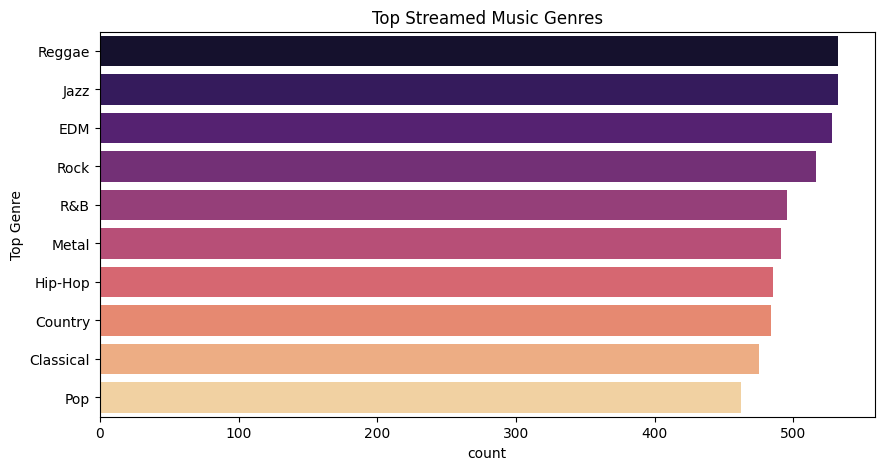

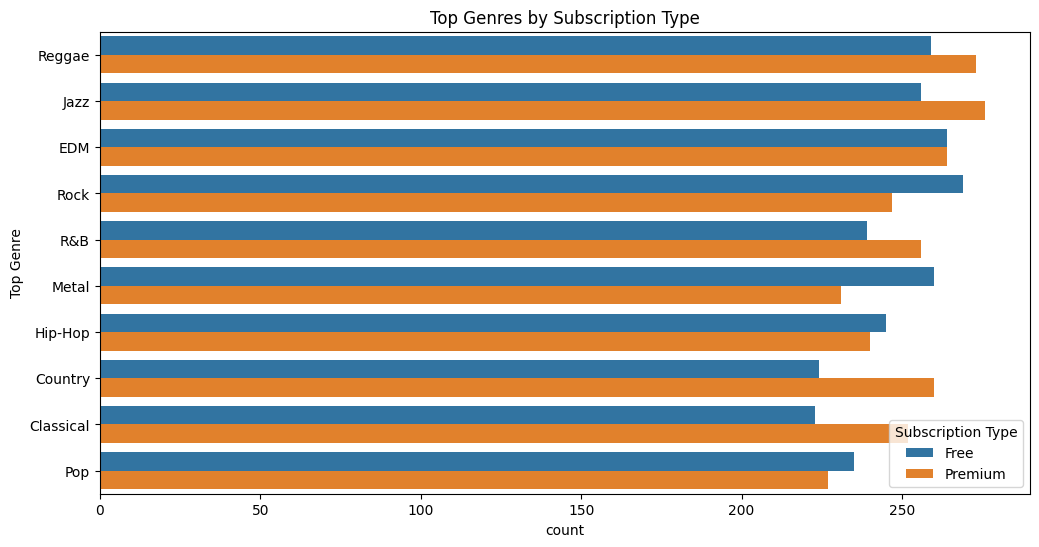

In [10]:
# ## 🎶 Top Music Genres: What’s Trending?
# 🔎 Which genres dominate music streaming worldwide?

plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Top Genre", order=df["Top Genre"].value_counts().index, palette="magma")
plt.title("Top Streamed Music Genres")
plt.show()

# Do premium and free users have different genre preferences?
plt.figure(figsize=(12,6))
sns.countplot(data=df, y="Top Genre", hue="Subscription Type", order=df["Top Genre"].value_counts().index)
plt.title("Top Genres by Subscription Type")
plt.show()

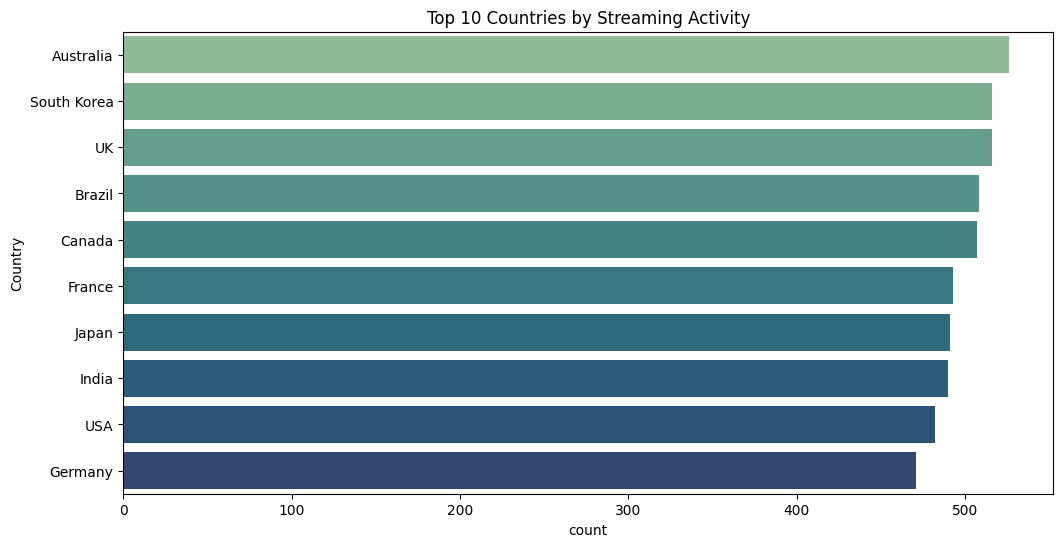

In [11]:
# ## 🌍 Streaming Habits by Country
# 📌 Does music preference change based on location?

plt.figure(figsize=(12,6))
sns.countplot(data=df, y="Country", order=df["Country"].value_counts().index[:10], palette="crest")
plt.title("Top 10 Countries by Streaming Activity")
plt.show()

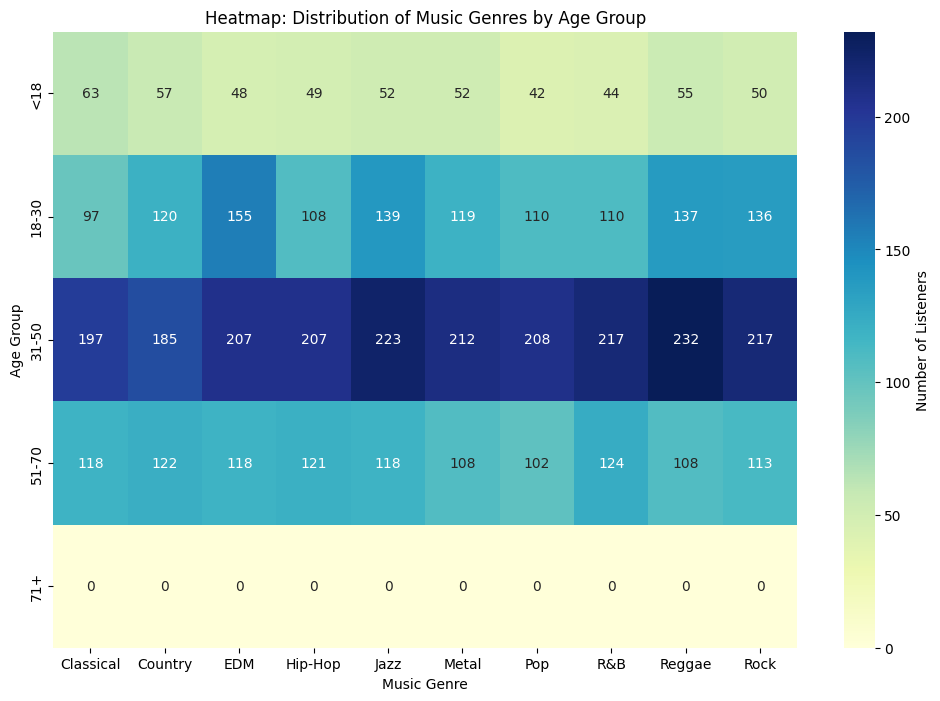

In [12]:
# Creating age groups
bins = [0, 18, 30, 50, 70, 100]
labels = ['<18', '18-30', '31-50', '51-70', '71+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Grouping data by "Age Group" and "Top Genre"
genre_age_counts = df.groupby(['Age Group', 'Top Genre'], observed=False).size().unstack().fillna(0)

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_age_counts, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Listeners'})
plt.title("Heatmap: Distribution of Music Genres by Age Group")
plt.xlabel("Music Genre")
plt.ylabel("Age Group")
plt.show()

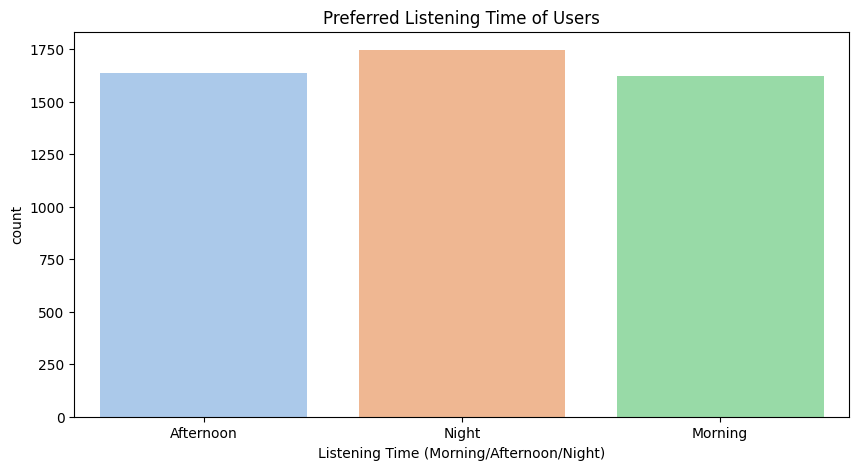

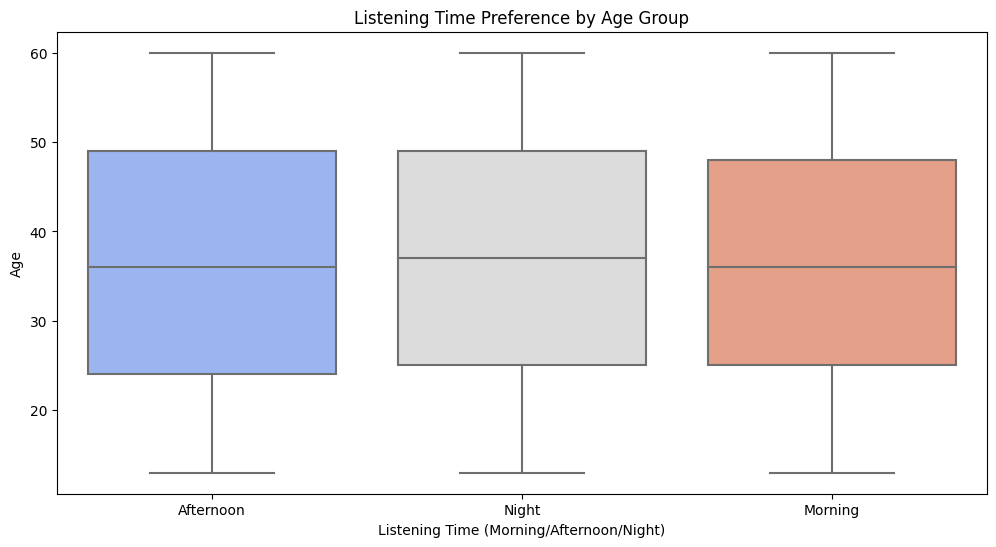

In [13]:
# ## 🕒 Listening Habits: When Do People Stream Music?
# 🔍 Morning, Afternoon, or Night—when are users most active?

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Listening Time (Morning/Afternoon/Night)", palette="pastel")
plt.title("Preferred Listening Time of Users")
plt.show()

# Does age influence streaming time?
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Listening Time (Morning/Afternoon/Night)", y="Age", palette="coolwarm")
plt.title("Listening Time Preference by Age Group")
plt.show()